<a href="https://colab.research.google.com/github/Herreran903/Baseline_JSP_Portafolio/blob/main/Baseline_JSP_Portafolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install pandas numpy scikit-learn tensorflow==2.15.* matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow==2.15.* (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.15.*


In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from google.colab import files

np.set_printoptions(suppress=True)
pd.set_option("display.max_columns", None)

In [ ]:
from google.colab import files
import io, pandas as pd, numpy as np

print("📁 Sube tu archivo .xlsx (Excel).")
uploaded = files.upload()
xlsx_name = list(uploaded.keys())[0]
raw_bytes = uploaded[xlsx_name]

xls = pd.ExcelFile(io.BytesIO(raw_bytes))
print("📑 Hojas disponibles:", xls.sheet_names)

sheet_to_use = xls.sheet_names[0]

df = pd.read_excel(io.BytesIO(raw_bytes), sheet_name=sheet_to_use)
print(f"✅ Leído '{xlsx_name}' hoja: '{sheet_to_use}'  → shape={df.shape}")
print("👀 Columnas detectadas:")
print(list(df.columns))
df.head(3)

📁 Sube tu archivo .xlsx (Excel).


Saving data.xlsx to data (2).xlsx
📑 Hojas disponibles: ['Sheet1']
✅ Leído 'data (2).xlsx' hoja: 'Sheet1'  → shape=(9720, 26)
👀 Columnas detectadas:
['Unnamed: 0', 'jobs', 'machines', 'rddd', 'speed', 'max_makespan', 'min_makespan', 'max_sum_energy', 'min_sum_energy', 'max_tardiness', 'min_window', 'max_window', 'mean_window', 'overlap', 'max_processing_time_value', 'min_processing_time_value', 'mean_processing_time_value', 'max_energy_value', 'min_energy_value', 'mean_energy_value', 'problema', 'cplex', 'gurobi', 'gecode', 'ga', 'pso']


,Unnamed: 0,jobs,machines,rddd,speed,max_makespan,min_makespan,max_sum_energy,min_sum_energy,max_tardiness,min_window,max_window,mean_window,overlap,max_processing_time_value,min_processing_time_value,mean_processing_time_value,max_energy_value,min_energy_value,mean_energy_value,problema,cplex,gurobi,gecode,ga,pso
0,0,5,5,0,1,864,194,1769,1769,-1,-1.0,-1.0,-1.0,-1.0,60,6,34.560000,60,6,34.560000,Problema0,0.119403,0.119403,0.119403,0.134328,0.134328
1,1,5,5,0,3,3561,141,1941,671,-1,-1.0,-1.0,-1.0,-1.0,246,4,67.426667,246,4,67.426667,Problema1,0.289474,0.289474,0.289474,0.311569,0.418987
2,2,5,5,0,3,3133,135,2000,801,-1,-1.0,-1.0,-1.0,-1.0,219,4,59.280000,219,4,59.280000,Problema10,0.273182,0.273182,0.273182,0.291876,0.354255


In [ ]:
import re

original_cols = list(df.columns)
df.columns = [str(c).strip() for c in df.columns]

unnamed_cols = [c for c in df.columns if re.match(r"^Unnamed:\s*\d+$", c, flags=re.IGNORECASE)]
if unnamed_cols:
    print("🧹 Eliminando columnas de índice exportadas:", unnamed_cols)
    df = df.drop(columns=unnamed_cols)

df.columns = [c.replace(" ", "_") for c in df.columns]
print("✅ Columnas finales:", list(df.columns))
print("📏 Shape:", df.shape)
display(df.head(3))

🧹 Eliminando columnas de índice exportadas: ['Unnamed: 0']
✅ Columnas finales: ['jobs', 'machines', 'rddd', 'speed', 'max_makespan', 'min_makespan', 'max_sum_energy', 'min_sum_energy', 'max_tardiness', 'min_window', 'max_window', 'mean_window', 'overlap', 'max_processing_time_value', 'min_processing_time_value', 'mean_processing_time_value', 'max_energy_value', 'min_energy_value', 'mean_energy_value', 'problema', 'cplex', 'gurobi', 'gecode', 'ga', 'pso']
📏 Shape: (9720, 25)


,jobs,machines,rddd,speed,max_makespan,min_makespan,max_sum_energy,min_sum_energy,max_tardiness,min_window,max_window,mean_window,overlap,max_processing_time_value,min_processing_time_value,mean_processing_time_value,max_energy_value,min_energy_value,mean_energy_value,problema,cplex,gurobi,gecode,ga,pso
0,5,5,0,1,864,194,1769,1769,-1,-1.0,-1.0,-1.0,-1.0,60,6,34.560000,60,6,34.560000,Problema0,0.119403,0.119403,0.119403,0.134328,0.134328
1,5,5,0,3,3561,141,1941,671,-1,-1.0,-1.0,-1.0,-1.0,246,4,67.426667,246,4,67.426667,Problema1,0.289474,0.289474,0.289474,0.311569,0.418987
2,5,5,0,3,3133,135,2000,801,-1,-1.0,-1.0,-1.0,-1.0,219,4,59.280000,219,4,59.280000,Problema10,0.273182,0.273182,0.273182,0.291876,0.354255


In [ ]:
import numpy as np
import pandas as pd

if "problema" not in df.columns:
    df["problema"] = ""

numeric_cols = [
    "cxd","jobs","machines","rddd","speed",
    "max_makespan","min_makespan","max_sum_energy","min_sum_energy",
    "max_tardiness","min_window","max_window","mean_window","overlap",
    "max_processing_time_value","min_processing_time_value","mean_processing_time_value",
    "max_energy_value","min_energy_value","mean_energy_value",
    "cplex","gurobi","gecode","ga","pso"
]

def coerce_numeric(series: pd.Series) -> pd.Series:
    if pd.api.types.is_numeric_dtype(series):
        return series
    s = series.astype(str).str.strip().str.replace(",", ".", regex=False)
    return pd.to_numeric(s, errors="coerce")

present_cols = [c for c in numeric_cols if c in df.columns]
for col in present_cols:
    df[col] = coerce_numeric(df[col])

print("🧾 Resumen rápido (numéricas convertidas donde aplicaba):")
print(df[present_cols].dtypes)

nan_report = df[present_cols].isna().sum().sort_values(ascending=False)
print("\n🔎 NaN por columna (post-conversión):")
print(nan_report)

display(df.head(3))

🧾 Resumen rápido (numéricas convertidas donde aplicaba):
jobs                            int64
machines                        int64
rddd                            int64
speed                           int64
max_makespan                    int64
min_makespan                    int64
max_sum_energy                  int64
min_sum_energy                  int64
max_tardiness                   int64
min_window                    float64
max_window                    float64
mean_window                   float64
overlap                       float64
max_processing_time_value       int64
min_processing_time_value       int64
mean_processing_time_value    float64
max_energy_value                int64
min_energy_value                int64
mean_energy_value             float64
cplex                         float64
gurobi                        float64
gecode                        float64
ga                            float64
pso                           float64
dtype: object

🔎 NaN por column

,jobs,machines,rddd,speed,max_makespan,min_makespan,max_sum_energy,min_sum_energy,max_tardiness,min_window,max_window,mean_window,overlap,max_processing_time_value,min_processing_time_value,mean_processing_time_value,max_energy_value,min_energy_value,mean_energy_value,problema,cplex,gurobi,gecode,ga,pso
0,5,5,0,1,864,194,1769,1769,-1,-1.0,-1.0,-1.0,-1.0,60,6,34.560000,60,6,34.560000,Problema0,0.119403,0.119403,0.119403,0.134328,0.134328
1,5,5,0,3,3561,141,1941,671,-1,-1.0,-1.0,-1.0,-1.0,246,4,67.426667,246,4,67.426667,Problema1,0.289474,0.289474,0.289474,0.311569,0.418987
2,5,5,0,3,3133,135,2000,801,-1,-1.0,-1.0,-1.0,-1.0,219,4,59.280000,219,4,59.280000,Problema10,0.273182,0.273182,0.273182,0.291876,0.354255


In [ ]:
feature_explainer = {
    "cxd": "Semilla/config id de generación de la instancia.",
    "jobs": "Número de trabajos (pedidos).",
    "machines": "Número de máquinas (recursos).",
    "rddd": "Tipo de ventanas temporales: 0=sin, 1=por trabajo, 2=por operación.",
    "speed": "Cantidad de niveles de velocidad disponibles.",
    "max_makespan": "Cota superior simple del tiempo total (agenda muy conservadora).",
    "min_makespan": "Cota inferior simple del tiempo total (por cargas mínimas).",
    "max_sum_energy": "Suma máxima de energía posible (velocidad/consumo altos).",
    "min_sum_energy": "Suma mínima de energía posible (velocidad/consumo bajos).",
    "max_tardiness": "Peor tardanza teórica; −1 si no hay due dates.",
    "min_window": "Ventana de tiempo más estrecha; −1 si no hay ventanas.",
    "max_window": "Ventana de tiempo más amplia; −1 si no hay ventanas.",
    "mean_window": "Tamaño promedio de ventana; −1 si no hay ventanas.",
    "overlap": "Grado de solape entre ventanas (0 bajo, 1 alto).",
    "max_processing_time_value": "Operación más larga de la instancia.",
    "min_processing_time_value": "Operación más corta.",
    "mean_processing_time_value": "Duración promedio de una operación.",
    "max_energy_value": "Mayor consumo energético por operación.",
    "min_energy_value": "Menor consumo energético por operación.",
    "mean_energy_value": "Consumo energético promedio por operación.",
    "problema": "Identificador textual de la instancia (metadato).",
    "cplex": "Rendimiento/objetivo de CPLEX (asumimos: menor es mejor).",
    "gurobi": "Rendimiento/objetivo de Gurobi (asumimos: menor es mejor).",
    "gecode": "Rendimiento/objetivo de Gecode (asumimos: menor es mejor).",
    "ga": "Rendimiento de un Algoritmo Genético (si está en el CSV).",
    "pso": "Rendimiento de PSO (si está en el CSV)."
}

for k, v in feature_explainer.items():
    if k in df.columns:
        print(f"{k:>28}  →  {v}")

                        jobs  →  Número de trabajos (pedidos).
                    machines  →  Número de máquinas (recursos).
                        rddd  →  Tipo de ventanas temporales: 0=sin, 1=por trabajo, 2=por operación.
                       speed  →  Cantidad de niveles de velocidad disponibles.
                max_makespan  →  Cota superior simple del tiempo total (agenda muy conservadora).
                min_makespan  →  Cota inferior simple del tiempo total (por cargas mínimas).
              max_sum_energy  →  Suma máxima de energía posible (velocidad/consumo altos).
              min_sum_energy  →  Suma mínima de energía posible (velocidad/consumo bajos).
               max_tardiness  →  Peor tardanza teórica; −1 si no hay due dates.
                  min_window  →  Ventana de tiempo más estrecha; −1 si no hay ventanas.
                  max_window  →  Ventana de tiempo más amplia; −1 si no hay ventanas.
                 mean_window  →  Tamaño promedio de ventana; −1 si

In [ ]:
solver_cols = [c for c in ["cplex","gurobi","gecode","ga","pso"] if c in df.columns]
assert len(solver_cols) >= 2, "Se requieren al menos 2 columnas de solver."

solver_vals = df[solver_cols].copy().fillna(np.inf)

y_idx = solver_vals.values.argmin(axis=1)
idx_to_solver = {i: s for i, s in enumerate(solver_cols)}
solver_to_idx = {s: i for i, s in idx_to_solver.items()}

df["best_solver_idx"] = y_idx
df["best_solver_name"] = [idx_to_solver[i] for i in y_idx]
print("🎯 Distribución de la clase 'best_solver_name':")
print(df["best_solver_name"].value_counts(dropna=False))
df[["problema"] + solver_cols + ["best_solver_name"]].head(10)

🎯 Distribución de la clase 'best_solver_name':
best_solver_name
gurobi    3460
ga        2234
cplex     2134
gecode    1676
pso        216
Name: count, dtype: int64


,problema,cplex,gurobi,gecode,ga,pso,best_solver_name
0,Problema0,0.119403,0.119403,0.119403,0.134328,0.134328,cplex
1,Problema1,0.289474,0.289474,0.289474,0.311569,0.418987,cplex
2,Problema10,0.273182,0.273182,0.273182,0.291876,0.354255,cplex
3,Problema100,NaN,NaN,NaN,0.637402,0.798210,ga
4,Problema1000,0.184348,0.184348,0.207553,0.552264,0.572760,cplex
5,Problema1001,0.183884,0.183884,0.207553,0.632616,0.597497,cplex
6,Problema1002,0.004619,0.004619,0.004619,0.004619,0.020707,cplex
7,Problema1003,0.590481,0.590425,0.819010,0.704847,0.746180,gurobi
8,Problema1004,0.563526,0.561363,0.819010,0.701382,0.722272,gurobi
9,Problema1005,0.267601,0.267601,0.267601,0.267601,0.314763,cplex


In [ ]:
# Usa ESTA celda en lugar de la 5 si en tus métricas "mayor es mejor".
solver_cols = [c for c in ["cplex","gurobi","gecode","ga","pso"] if c in df.columns]
solver_vals = df[solver_cols].copy().fillna(-np.inf)

y_idx = solver_vals.values.argmax(axis=1)  # mayor es mejor
idx_to_solver = {i: s for i, s in enumerate(solver_cols)}
solver_to_idx = {s: i for i, s in idx_to_solver.items()}

df["best_solver_idx"] = y_idx
df["best_solver_name"] = [idx_to_solver[i] for i in y_idx]
print("🎯 Distribución de la clase 'best_solver_name':")
print(df["best_solver_name"].value_counts(dropna=False))

In [ ]:
drop_cols = ["problema","best_solver_idx","best_solver_name"] + solver_cols
feature_cols = [c for c in df.columns if c not in drop_cols]

X_full = df[feature_cols].astype(float)
y_full = df["best_solver_idx"].astype(int)

mask_all_nan = X_full.isna().all(axis=1)
if mask_all_nan.any():
    print("⚠️ Filas eliminadas por no tener ninguna feature:", mask_all_nan.sum())
X = X_full[~mask_all_nan]
y = y_full[~mask_all_nan]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.20, random_state=42, stratify=y_train
)

len(X_train), len(X_val), len(X_test)

(6220, 1556, 1944)

In [ ]:
train_median = np.nanmedian(X_train, axis=0)

def impute_with_median(A, med):
    B = A.copy()
    inds = np.where(np.isnan(B))
    B[inds] = np.take(med, inds[1])
    return B

X_train_imp = impute_with_median(X_train.values, train_median)
X_val_imp   = impute_with_median(X_val.values,   train_median)
X_test_imp  = impute_with_median(X_test.values,  train_median)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_imp)
X_val_sc   = scaler.transform(X_val_imp)
X_test_sc  = scaler.transform(X_test_imp)

num_features = X_train_sc.shape[1]
num_classes  = len(solver_cols)
print(f"✅ Features: {num_features} | Clases: {num_classes} → {solver_cols}")

✅ Features: 19 | Clases: 5 → ['cplex', 'gurobi', 'gecode', 'ga', 'pso']


In [ ]:
classes_unique = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=classes_unique,
    y=y_train
)
class_weight_dict = {int(k): float(v) for k, v in zip(classes_unique, class_weights)}
class_weight_dict

In [ ]:
def build_mlp(input_dim, output_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(output_dim, activation="softmax")
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

model = build_mlp(num_features, num_classes)
es = keras.callbacks.EarlyStopping(
    monitor="val_accuracy", patience=15, mode="max", restore_best_weights=True
)

history = model.fit(
    X_train_sc, y_train,
    validation_data=(X_val_sc, y_val),
    epochs=200,
    batch_size=64,
    callbacks=[es],
    verbose=1,
    # class_weight=class_weight_dict
)

print("📈 Mejor accuracy en validación:", np.max(history.history["val_accuracy"]))


Epoch 1/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4689 - loss: 1.2692 - val_accuracy: 0.7121 - val_loss: 0.7790
Epoch 2/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6919 - loss: 0.8068 - val_accuracy: 0.7545 - val_loss: 0.6627
Epoch 3/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7245 - loss: 0.7017 - val_accuracy: 0.7635 - val_loss: 0.6249
Epoch 4/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7373 - loss: 0.6788 - val_accuracy: 0.7596 - val_loss: 0.6034
Epoch 5/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7500 - loss: 0.6357 - val_accuracy: 0.7802 - val_loss: 0.5793
Epoch 6/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7655 - loss: 0.6185 - val_accuracy: 0.7821 - val_loss: 0.5606
Epoch 7/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7551 - loss: 0.6159 - val_accuracy: 0.7853 - val_loss: 0.5604
Epoch 8/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7732 - loss: 0.5810 - val_accuracy: 0.7776 - v

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.xlabel("Época"); plt.ylabel("Accuracy"); plt.legend(); plt.grid(True)
plt.title("Evolución de accuracy")
plt.show()


✅ Accuracy en TEST: 0.8488

📊 Reporte de clasificación (TEST):
              precision    recall  f1-score   support

       cplex     0.8553    0.7752    0.8133       427
      gurobi     0.8160    0.8844    0.8488       692
      gecode     0.8587    0.9254    0.8908       335
          ga     0.9093    0.8747    0.8917       447
         pso     0.3750    0.1395    0.2034        43

    accuracy                         0.8488      1944
   macro avg     0.7629    0.7198    0.7296      1944
weighted avg     0.8437    0.8488    0.8438      1944



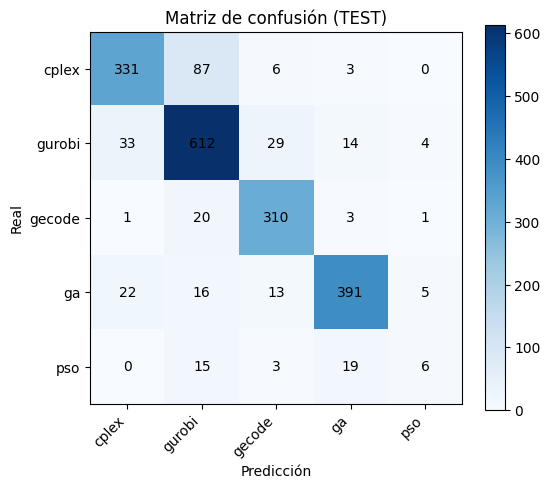

In [ ]:
y_pred_proba = model.predict(X_test_sc, verbose=0)
y_pred = y_pred_proba.argmax(axis=1)

acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy en TEST: {acc:.4f}\n")

print("📊 Reporte de clasificación (TEST):")
print(classification_report(y_test, y_pred, target_names=solver_cols, digits=4))

cm = confusion_matrix(y_test, y_pred, labels=list(range(num_classes)))
fig, ax = plt.subplots(figsize=(6,5))
im = ax.imshow(cm, cmap="Blues")
ax.set_xticks(range(num_classes)); ax.set_yticks(range(num_classes))
ax.set_xticklabels(solver_cols, rotation=45, ha="right"); ax.set_yticklabels(solver_cols)
ax.set_xlabel("Predicción"); ax.set_ylabel("Real")
for (i, j), v in np.ndenumerate(cm):
    ax.text(j, i, str(v), ha='center', va='center', color="black")
plt.title("Matriz de confusión (TEST)")
plt.colorbar(im); plt.show()


In [ ]:
def explain_instance(idx, df_full, feature_explainer, solver_cols):
    row = df_full.loc[idx]
    print("\n🔎 Instancia:", row.get("problema", f"fila {idx}"))

    if set(solver_cols).issubset(df_full.columns):
        sv = row[solver_cols]
        print("Valores de solver (menor es mejor):")
        print(sv.to_string())
        print("→ Mejor solver (según CSV):", sv.astype(float).idxmin())

    subset = [c for c in ["jobs","machines","rddd","speed",
                          "min_makespan","max_makespan",
                          "min_sum_energy","max_sum_energy",
                          "max_tardiness","overlap",
                          "mean_processing_time_value","mean_energy_value"] if c in df_full.columns]
    if subset:
        print("\nFeatures clave:")
        for c in subset:
            desc = feature_explainer.get(c, "")
            print(f" - {c}: {row[c]} — {desc}")

first_idx = X.index[0]
explain_instance(first_idx, df, feature_explainer, solver_cols)



🔎 Instancia: Problema0
Valores de solver (menor es mejor):
cplex     0.119403
gurobi    0.119403
gecode    0.119403
ga        0.134328
pso       0.134328
→ Mejor solver (según CSV): cplex

Features clave:
 - jobs: 5 — Número de trabajos (pedidos).
 - machines: 5 — Número de máquinas (recursos).
 - rddd: 0 — Tipo de ventanas temporales: 0=sin, 1=por trabajo, 2=por operación.
 - speed: 1 — Cantidad de niveles de velocidad disponibles.
 - min_makespan: 194 — Cota inferior simple del tiempo total (por cargas mínimas).
 - max_makespan: 864 — Cota superior simple del tiempo total (agenda muy conservadora).
 - min_sum_energy: 1769 — Suma mínima de energía posible (velocidad/consumo bajos).
 - max_sum_energy: 1769 — Suma máxima de energía posible (velocidad/consumo altos).
 - max_tardiness: -1 — Peor tardanza teórica; −1 si no hay due dates.
 - overlap: -1.0 — Grado de solape entre ventanas (0 bajo, 1 alto).
 - mean_processing_time_value: 34.56 — Duración promedio de una operación.
 - mean_en

In [ ]:
model.save("best_solver_mlp_keras.h5")
np.savez("preproc_utils.npz",
         train_median=np.nanmedian(X_train, axis=0),
         scaler_mean=scaler.mean_,
         scaler_scale=scaler.scale_,
         feature_cols=np.array(feature_cols, dtype=object),
         solver_cols=np.array(solver_cols, dtype=object),
         idx_to_solver=np.array([s for _, s in sorted(idx_to_solver.items())], dtype=object))

print("💾 Guardado:")
print(" - best_solver_mlp_keras.h5")
print(" - preproc_utils.npz")


In [ ]:
def predict_row(i):
    rowX = df.loc[i, feature_cols].astype(float).values.reshape(1, -1)
    r_imp = rowX.copy()
    nan_mask = np.isnan(r_imp)
    r_imp[nan_mask] = np.take(train_median, np.where(nan_mask)[1])
    r_sc = scaler.transform(r_imp)
    proba = model.predict(r_sc, verbose=0)[0]
    pred_idx = proba.argmax()
    return idx_to_solver[pred_idx], {solver_cols[j]: float(proba[j]) for j in range(len(solver_cols))}

pred, proba = predict_row(first_idx)
print("🔮 Predicción:", pred)
print("   Probabilidades:", proba)

🔮 Predicción: cplex
   Probabilidades: {'cplex': 0.916521430015564, 'gurobi': 0.0755438432097435, 'gecode': 6.17464174865745e-05, 'ga': 0.007868180982768536, 'pso': 4.778804850502638e-06}


In [ ]:
import numpy as np
import pandas as pd

solver_cols_no_pso = [c for c in ["cplex","gurobi","gecode","ga"] if c in df.columns]
assert len(solver_cols_no_pso) >= 2, "Se requieren al menos 2 solvers para multiclase."

solver_vals = df[solver_cols_no_pso].copy().fillna(np.inf)
y_idx_no_pso = solver_vals.values.argmin(axis=1)
idx_to_solver_no_pso = {i: s for i, s in enumerate(solver_cols_no_pso)}
solver_to_idx_no_pso = {s: i for i, s in idx_to_solver_no_pso.items()}

df_no_pso = df.copy()
df_no_pso["best_solver_idx"]  = y_idx_no_pso
df_no_pso["best_solver_name"] = [idx_to_solver_no_pso[i] for i in y_idx_no_pso]

mask_all_bad = np.isinf(solver_vals.values).all(axis=1)
if mask_all_bad.any():
    print("🧹 Filas eliminadas por falta total de valores de solver (no-pso):", mask_all_bad.sum())
    df_no_pso = df_no_pso.loc[~mask_all_bad].copy()

print("🎯 Nueva distribución de clases (sin pso):")
print(df_no_pso["best_solver_name"].value_counts())
print("\nSolvers activos:", solver_cols_no_pso)
display(df_no_pso[["problema"] + solver_cols_no_pso + ["best_solver_name"]].head(8))


🎯 Nueva distribución de clases (sin pso):
best_solver_name
gurobi    3460
ga        2442
cplex     2135
gecode    1683
Name: count, dtype: int64

Solvers activos: ['cplex', 'gurobi', 'gecode', 'ga']


,problema,cplex,gurobi,gecode,ga,best_solver_name
0,Problema0,0.119403,0.119403,0.119403,0.134328,cplex
1,Problema1,0.289474,0.289474,0.289474,0.311569,cplex
2,Problema10,0.273182,0.273182,0.273182,0.291876,cplex
3,Problema100,NaN,NaN,NaN,0.637402,ga
4,Problema1000,0.184348,0.184348,0.207553,0.552264,cplex
5,Problema1001,0.183884,0.183884,0.207553,0.632616,cplex
6,Problema1002,0.004619,0.004619,0.004619,0.004619,cplex
7,Problema1003,0.590481,0.590425,0.819010,0.704847,gurobi


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

drop_cols = ["problema","best_solver_idx","best_solver_name"] + solver_cols_no_pso + ["pso"]
feature_cols_no_pso = [c for c in df_no_pso.columns if c not in drop_cols]

X_full = df_no_pso[feature_cols_no_pso].astype(float)
y_full = df_no_pso["best_solver_idx"].astype(int)

mask_all_nan = X_full.isna().all(axis=1)
if mask_all_nan.any():
    print("⚠️ Filas sin features (todas NaN) eliminadas:", mask_all_nan.sum())
X = X_full[~mask_all_nan]
y = y_full[~mask_all_nan]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.20, random_state=42, stratify=y_train
)

train_median = np.nanmedian(X_train, axis=0)
def impute_with_median(A, med):
    B = A.copy()
    inds = np.where(np.isnan(B))
    B[inds] = np.take(med, inds[1])
    return B

X_train_imp = impute_with_median(X_train.values, train_median)
X_val_imp   = impute_with_median(X_val.values,   train_median)
X_test_imp  = impute_with_median(X_test.values,  train_median)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_imp)
X_val_sc   = scaler.transform(X_val_imp)
X_test_sc  = scaler.transform(X_test_imp)

num_features = X_train_sc.shape[1]
num_classes  = len(solver_cols_no_pso)
print(f"✅ Features: {num_features} | Clases: {num_classes} → {solver_cols_no_pso}")

classes_unique = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=classes_unique,
    y=y_train
)
class_weight_dict = {int(k): float(v) for k, v in zip(classes_unique, class_weights)}
print("⚖️ Pesos de clase:", class_weight_dict)


✅ Features: 19 | Clases: 4 → ['cplex', 'gurobi', 'gecode', 'ga']
⚖️ Pesos de clase: {0: 1.138360175695461, 1: 0.7023486901535682, 2: 1.4438254410399258, 3: 0.9948816378758797}


Epoch 1/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5539 - loss: 1.0641 - val_accuracy: 0.6934 - val_loss: 0.7158
Epoch 2/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7116 - loss: 0.7008 - val_accuracy: 0.7532 - val_loss: 0.6272
Epoch 3/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7392 - loss: 0.6427 - val_accuracy: 0.7609 - val_loss: 0.5827
Epoch 4/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7722 - loss: 0.5721 - val_accuracy: 0.7654 - val_loss: 0.5613
Epoch 5/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7581 - loss: 0.5727 - val_accuracy: 0.7719 - val_loss: 0.5474
Epoch 6/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7643 - loss: 0.5626 - val_accuracy: 0.7937 - val_loss: 0.5219
Epoch 7/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7806 - loss: 0.5428 - val_accuracy: 0.8021 - val_loss: 0.5064
Epoch 8/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7780 - loss: 0.5351 - val_accuracy: 0.7866 - 

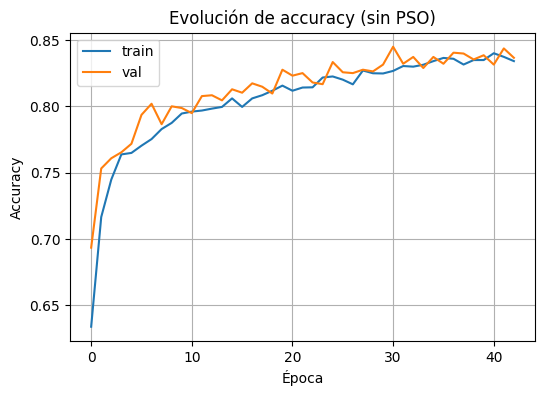

✅ Accuracy en TEST (sin PSO): 0.8519

📊 Reporte de clasificación (TEST, sin PSO):
              precision    recall  f1-score   support

       cplex     0.8312    0.7728    0.8010       427
      gurobi     0.8152    0.8540    0.8342       692
      gecode     0.8667    0.8872    0.8768       337
          ga     0.9140    0.8934    0.9036       488

    accuracy                         0.8519      1944
   macro avg     0.8568    0.8519    0.8539      1944
weighted avg     0.8524    0.8519    0.8517      1944



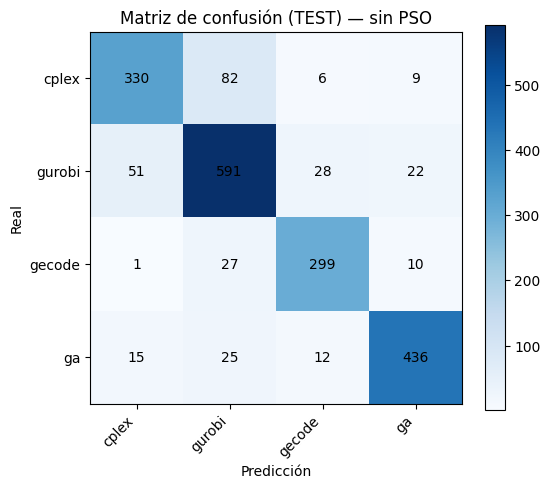

🔝 Top-2 accuracy (sin PSO): 0.9743


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_mlp(input_dim, output_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(output_dim, activation="softmax")
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

model = build_mlp(num_features, num_classes)
es = keras.callbacks.EarlyStopping(
    monitor="val_accuracy", patience=12, mode="max", restore_best_weights=True
)

history = model.fit(
    X_train_sc, y_train,
    validation_data=(X_val_sc, y_val),
    epochs=200,
    batch_size=64,
    callbacks=[es],
    verbose=1,
    # class_weight=class_weight_dict
)

plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.xlabel("Época"); plt.ylabel("Accuracy"); plt.legend(); plt.grid(True)
plt.title("Evolución de accuracy (sin PSO)")
plt.show()

y_pred_proba = model.predict(X_test_sc, verbose=0)
y_pred = y_pred_proba.argmax(axis=1)

acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy en TEST (sin PSO): {acc:.4f}\n")

print("📊 Reporte de clasificación (TEST, sin PSO):")
print(classification_report(y_test, y_pred, target_names=solver_cols_no_pso, digits=4))

cm = confusion_matrix(y_test, y_pred, labels=list(range(num_classes)))
fig, ax = plt.subplots(figsize=(6,5))
im = ax.imshow(cm, cmap="Blues")
ax.set_xticks(range(num_classes)); ax.set_yticks(range(num_classes))
ax.set_xticklabels(solver_cols_no_pso, rotation=45, ha="right"); ax.set_yticklabels(solver_cols_no_pso)
ax.set_xlabel("Predicción"); ax.set_ylabel("Real")
for (i, j), v in np.ndenumerate(cm):
    ax.text(j, i, str(v), ha='center', va='center', color="black")
plt.title("Matriz de confusión (TEST) — sin PSO")
plt.colorbar(im); plt.show()

top2 = (np.argsort(-y_pred_proba, axis=1)[:, :2] == y_test.values.reshape(-1,1)).any(axis=1).mean()
print("🔝 Top-2 accuracy (sin PSO):", round(float(top2), 4))


In [ ]:
!pip -q install xgboost
import xgboost as xgb
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

if 'solver_cols_no_pso' in globals():
    class_names = solver_cols_no_pso
elif 'solver_cols' in globals():
    class_names = solver_cols
else:
    raise RuntimeError("No encuentro nombres de clases. Asegúrate de haber corrido la parte de creación de etiquetas.")

num_classes = len(class_names)

if 'class_weight_dict' not in globals():
    from sklearn.utils.class_weight import compute_class_weight
    classes_unique = np.unique(y_train)
    cw = compute_class_weight(class_weight="balanced", classes=classes_unique, y=y_train)
    class_weight_dict = {int(k): float(v) for k, v in zip(classes_unique, cw)}

def build_sample_weights(y, cw_dict):
    return np.array([cw_dict[int(cls)] for cls in y], dtype=np.float32)

w_train = build_sample_weights(y_train, class_weight_dict)
w_val   = build_sample_weights(y_val,   class_weight_dict)

dtrain = xgb.DMatrix(X_train_sc, label=y_train, weight=w_train, feature_names=[f"f{i}" for i in range(X_train_sc.shape[1])])
dval   = xgb.DMatrix(X_val_sc,   label=y_val,   weight=w_val,   feature_names=[f"f{i}" for i in range(X_val_sc.shape[1])])
dtest  = xgb.DMatrix(X_test_sc,  label=y_test,  feature_names=[f"f{i}" for i in range(X_test_sc.shape[1])])

print(f"✅ XGBoost listo. Clases={num_classes} → {class_names}")

✅ XGBoost listo. Clases=4 → ['cplex', 'gurobi', 'gecode', 'ga']


In [ ]:
results = {}
params = dict(
    objective = "multi:softprob",
    num_class = num_classes,
    max_depth = 6,
    eta       = 0.1,
    subsample = 0.9,
    colsample_bytree = 0.9,
    min_child_weight = 1.0,
    reg_lambda = 1.0,
    reg_alpha  = 0.0,
    tree_method = "hist",
    eval_metric = ["mlogloss", "merror"],
)

evals = [(dtrain, "train"), (dval, "val")]
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    evals_result=results,
    verbose_eval=50
)

print("🌟 Best iteration:", bst.best_iteration)
print("📉 Últimos métricos guardados:",
      {k: {m: v[-1] for m, v in results[k].items()} for k in results})


[0]	train-mlogloss:1.25590	train-merror:0.13430	val-mlogloss:1.26333	val-merror:0.16780
[50]	train-mlogloss:0.24820	train-merror:0.08518	val-mlogloss:0.36528	val-merror:0.13293
[100]	train-mlogloss:0.18326	train-merror:0.06099	val-mlogloss:0.35138	val-merror:0.13607
[123]	train-mlogloss:0.16306	train-merror:0.05134	val-mlogloss:0.35032	val-merror:0.13681
🌟 Best iteration: 73
📉 Últimos métricos guardados: {'train': {'mlogloss': 0.16305835917815226, 'merror': 0.05133935920414973}, 'val': {'mlogloss': 0.35032059451260134, 'merror': 0.13680927736541906}}


✅ XGBoost — Accuracy TEST: 0.8616

📊 Reporte de clasificación (TEST):
              precision    recall  f1-score   support

       cplex     0.8078    0.8267    0.8171       427
      gurobi     0.8644    0.8107    0.8367       692
      gecode     0.8489    0.9169    0.8816       337
          ga     0.9150    0.9262    0.9206       488

    accuracy                         0.8616      1944
   macro avg     0.8590    0.8701    0.8640      1944
weighted avg     0.8620    0.8616    0.8612      1944

🔝 Top-2 accuracy: 0.983

📦 Frecuencia por clase en Top-2:
 - cplex: 866 / 1944 = 0.445
 - gurobi: 1381 / 1944 = 0.710
 - gecode: 790 / 1944 = 0.406
 - ga: 851 / 1944 = 0.438


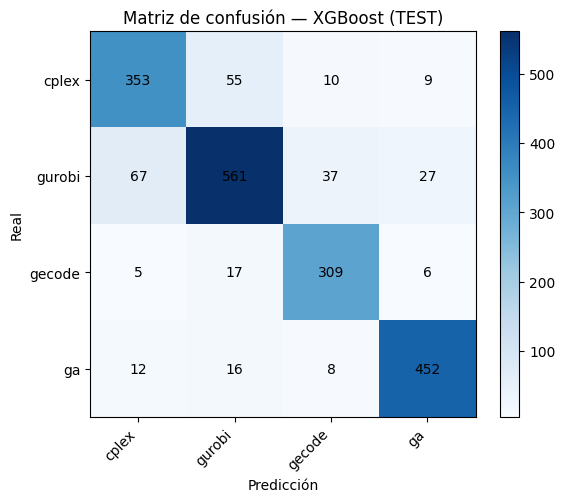

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

proba = bst.predict(dtest, iteration_range=(0, bst.best_iteration + 1))
y_pred = proba.argmax(axis=1)

acc = accuracy_score(y_test, y_pred)
print(f"✅ XGBoost — Accuracy TEST: {acc:.4f}\n")

print("📊 Reporte de clasificación (TEST):")
print(classification_report(y_test, y_pred, target_names=class_names, digits=4))

y_true_np = y_test.to_numpy().reshape(-1, 1)
top2_hits = (np.argsort(-proba, axis=1)[:, :2] == y_true_np).any(axis=1)
top2_acc = top2_hits.mean()
print("🔝 Top-2 accuracy:", round(float(top2_acc), 4))

top2_idx = np.argsort(-proba, axis=1)[:, :2]
counts_top2 = {cls: int((top2_idx == i).any(axis=1).sum()) for i, cls in enumerate(class_names)}
print("\n📦 Frecuencia por clase en Top-2:")
for cls, c in counts_top2.items():
    print(f" - {cls}: {c} / {len(y_test)} = {c/len(y_test):.3f}")

cm = confusion_matrix(y_test, y_pred, labels=list(range(len(class_names))))
fig, ax = plt.subplots(figsize=(6,5))
im = ax.imshow(cm, cmap="Blues")
ax.set_xticks(range(len(class_names))); ax.set_yticks(range(len(class_names)))
ax.set_xticklabels(class_names, rotation=45, ha="right"); ax.set_yticklabels(class_names)
ax.set_xlabel("Predicción"); ax.set_ylabel("Real")
for (i, j), v in np.ndenumerate(cm):
    ax.text(j, i, str(v), ha='center', va='center', color="black")
plt.title("Matriz de confusión — XGBoost (TEST)")
plt.colorbar(im); plt.tight_layout(); plt.show()

🏅 Top 20 features por ganancia:
 1. f0  →  gain=23.019915
 2. f3  →  gain=14.061163
 3. f1  →  gain=9.332194
 4. f6  →  gain=5.840756
 5. f13  →  gain=4.976958
 6. f4  →  gain=4.551877
 7. f2  →  gain=4.137698
 8. f9  →  gain=4.032249
 9. f8  →  gain=3.053907
10. f7  →  gain=2.664787
11. f12  →  gain=2.538123
12. f11  →  gain=1.870878
13. f17  →  gain=1.791100
14. f10  →  gain=1.626139
15. f5  →  gain=1.523906
16. f18  →  gain=1.433457
17. f14  →  gain=1.267401
18. f16  →  gain=1.182104
19. f15  →  gain=1.029480


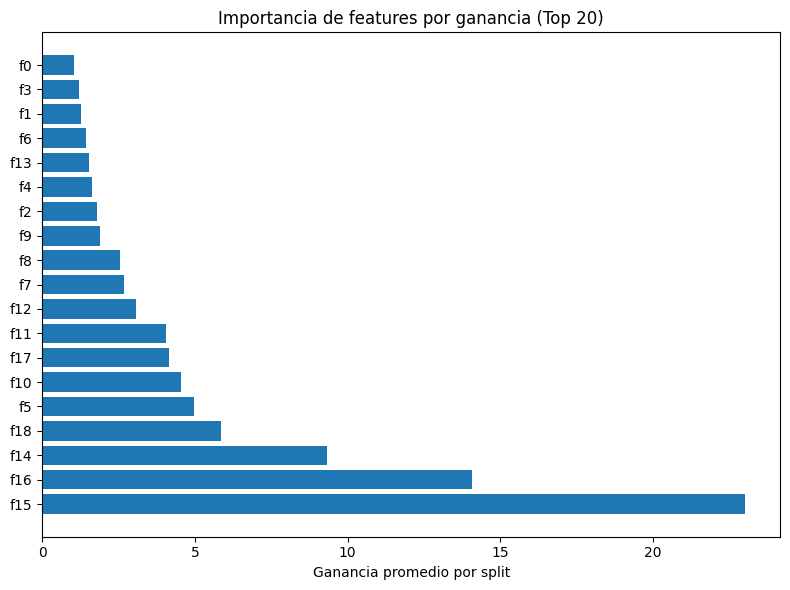

In [ ]:
importance = bst.get_score(importance_type="gain")  # dict: 'f0': gain, ...
items = sorted(importance.items(), key=lambda kv: kv[1], reverse=True)
top_k = 20

print(f"🏅 Top {top_k} features por ganancia:")
for i, (f, g) in enumerate(items[:top_k], 1):
    print(f"{i:>2}. {f}  →  gain={g:.6f}")

labels = [f for f, _ in items[:top_k]]
values = [g for _, g in items[:top_k]]
plt.figure(figsize=(8,6))
plt.barh(range(len(values)-1, -1, -1), values[::-1])
plt.yticks(range(len(labels)), labels[::-1])
plt.title("Importancia de features por ganancia (Top 20)")
plt.xlabel("Ganancia promedio por split")
plt.tight_layout()
plt.show()
